# Wine_cleaning

In [3]:
# Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
# Import data
wine_data_df = pd.read_csv("Data/winemag-data-130k-v2.csv")  
print(wine_data_df.shape)
wine_data_df.head()

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Select and keep only US data

In [5]:
# Only keep rows where country = US
US_wine_data_df = wine_data_df.loc[wine_data_df["country"] == "US"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [6]:
# Drop columns that are not useful: Unnamed: 0, country, taster_name, taster_twitter_handle
US_wine_data_df = US_wine_data_df.drop(columns=["Unnamed: 0", "country","taster_name", "taster_twitter_handle"], axis=1)
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 10)


,description,designation,points,price,province,region_1,region_2,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


## Evaluate data and clean

In [7]:
# Look at info.
US_wine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  54504 non-null  object 
 1   designation  36908 non-null  object 
 2   points       54504 non-null  int64  
 3   price        54265 non-null  float64
 4   province     54504 non-null  object 
 5   region_1     54226 non-null  object 
 6   region_2     50511 non-null  object 
 7   title        54504 non-null  object 
 8   variety      54504 non-null  object 
 9   winery       54504 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.6+ MB


In [8]:
# Drop additional column that is not going to be useful: 
# "designation", which is the vineyard where grapes are from.  17,596 null -> 32% null values
# Doesn't seem likely that we'll need this information later.
US_wine_data_df = US_wine_data_df.drop(columns=["designation"], axis=1)
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 9)


,description,points,price,province,region_1,region_2,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [9]:
# Make a copy of the dataframe
US_wine_data_df_copy = US_wine_data_df
US_wine_data_df_copy.shape

(54504, 9)

In [10]:
# Replace NaN in region_1 with corresponding value from same row in province
# https://stackoverflow.com/questions/49019230/replace-nan-in-one-column-with-the-value-from-another-column-in-pandas-whats-w
US_wine_data_df_copy['region_1'] = US_wine_data_df.apply(lambda row: row['province'] if pd.isnull(row['region_1']) else row['region_1'], axis=1)

In [11]:
# Determine value_counts
province_counts = US_wine_data_df_copy.province.value_counts()
province_counts

California           36247
Washington            8639
Oregon                5373
New York              2688
Virginia               777
Idaho                  192
Michigan               114
America                 95
Texas                   94
Colorado                68
New Mexico              45
Arizona                 41
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Massachusetts            7
Washington-Oregon        7
Illinois                 6
Nevada                   4
Iowa                     4
Connecticut              3
Vermont                  3
Hawaii                   1
Kentucky                 1
Rhode Island             1
Name: province, dtype: int64

In [12]:
# Determine value_counts for binning
region_1_counts = US_wine_data_df_copy.region_1.value_counts()
region_1_counts

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2631
Paso Robles                2350
                           ... 
Napa Valley-Paso Robles       1
McDowell Valley               1
Hawaii                        1
Mendocino-Amador              1
Lake-Sonoma-Napa              1
Name: region_1, Length: 266, dtype: int64

In [13]:
# Replace NaN in region_2 with corresponding value from same row in region_1
# https://stackoverflow.com/questions/49019230/replace-nan-in-one-column-with-the-value-from-another-column-in-pandas-whats-w
US_wine_data_df_copy['region_2'] = US_wine_data_df.apply(lambda row: row['region_1'] if pd.isnull(row['region_2']) else row['region_2'], axis=1)
US_wine_data_df_copy.head()

,description,points,price,province,region_1,region_2,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [14]:
# Determine value_counts
region_2_counts = US_wine_data_df_copy.region_2.value_counts()
region_2_counts

Central Coast        11097
Sonoma                9029
Columbia Valley       8105
Napa                  6816
Willamette Valley     3725
                     ...  
Texoma                   1
Hawaii                   1
Isle St. George          1
Kentucky                 1
California-Oregon        1
Name: region_2, Length: 78, dtype: int64

In [15]:
# Look at dataframe info again.
US_wine_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54504 entries, 2 to 129967
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  54504 non-null  object 
 1   points       54504 non-null  int64  
 2   price        54265 non-null  float64
 3   province     54504 non-null  object 
 4   region_1     54504 non-null  object 
 5   region_2     54504 non-null  object 
 6   title        54504 non-null  object 
 7   variety      54504 non-null  object 
 8   winery       54504 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.2+ MB


In [16]:
# Drop rows with NaN.  Max rows US =54504
# "price" only has 54226 rows.  It will only reduce data by 1/2%
US_wine_data_df_copy = US_wine_data_df_copy.dropna()
print(US_wine_data_df_copy.shape)
US_wine_data_df_copy.head()

(54265, 9)


,description,points,price,province,region_1,region_2,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [17]:
# Create a DataFrame to hold columns that won't be used in machine learning in case we want them later
US_wine_data_title_df = US_wine_data_df_copy.drop(columns=["points", "price", "province", "variety", "winery"], axis=1)
print(US_wine_data_title_df.shape)
US_wine_data_title_df.head()

(54265, 4)


,description,region_1,region_2,title
2,"Tart and snappy, the flavors of lime flesh and...",Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,"Pineapple rind, lemon pith and orange blossom ...",Lake Michigan Shore,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...
4,"Much like the regular bottling from 2012, this...",Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...
10,"Soft, supple plum envelopes an oaky structure ...",Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...
12,"Slightly reduced, this wine offers a chalky, t...",Alexander Valley,Sonoma,Louis M. Martini 2012 Cabernet Sauvignon (Alex...


In [18]:
# Drop additional columns that we may want back later: "description" - of flavors, i.e. tart and snappy, oaky, etc.
# "title" - name on the bottle; region_1, region_2

US_wine_data_df_ml = US_wine_data_df_copy.drop(columns=["description", "region_1", "region_2", "title"], axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

(54265, 5)


,points,price,province,variety,winery
2,87,14.0,Oregon,Pinot Gris,Rainstorm
3,87,13.0,Michigan,Riesling,St. Julian
4,87,65.0,Oregon,Pinot Noir,Sweet Cheeks
10,87,19.0,California,Cabernet Sauvignon,Kirkland Signature
12,87,34.0,California,Cabernet Sauvignon,Louis M. Martini


In [19]:
# Save cleaned dataframes
# All US data after drop Na
US_wine_data_df_copy.to_csv("Data/US_wine_data.csv", index=False)

# Save columns to add back in later ("description", "title", "region_1", "region_2")
US_wine_data_title_df.to_csv("Data/US_wine_data_title.csv", index=False)

# Save columns for machine learning ("points","price","province","variety","winery")
US_wine_data_df_ml.to_csv("Data/US_wine_data_ml.csv", index=False)


## Starting point for machine learning preprocessing

In [20]:
# Import data
US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_ml.csv")

In [21]:
US_wine_data_df_ml.nunique()

points        21
price        160
province      27
variety      257
winery      5368
dtype: int64

In [22]:
# Province will be our target. Determine value_counts to understand data.
# There are two categories that may need further exploration: America & Washington-Oregon
province_counts = US_wine_data_df_ml.province.value_counts()
province_counts

California           36104
Washington            8583
Oregon                5359
New York              2676
Virginia               770
Idaho                  190
Michigan               111
America                 95
Texas                   93
Colorado                68
New Mexico              45
Arizona                 40
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Massachusetts            7
Washington-Oregon        7
Illinois                 6
Nevada                   4
Iowa                     4
Connecticut              3
Vermont                  3
Hawaii                   1
Kentucky                 1
Rhode Island             1
Name: province, dtype: int64

In [23]:
# Determine value_counts for binning
variety_counts = US_wine_data_df_ml.variety.value_counts()
variety_counts

Pinot Noir                    9857
Cabernet Sauvignon            7280
Chardonnay                    6773
Syrah                         3232
Red Blend                     2948
                              ... 
Malvasia                         1
Tinta Amarela                    1
Garnacha Blanca                  1
Prosecco                         1
Cabernet Sauvignon-Barbera       1
Name: variety, Length: 257, dtype: int64

<AxesSubplot:ylabel='Density'>

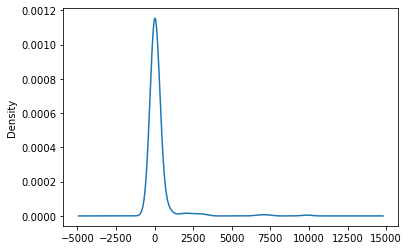

In [24]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [25]:
# Determine which values to replace.  Per the plot, we tried <500 but after looking
# results we decided that we wanted to be more inclusive since some mainstream wines
# would be binned in "other".  Therefore we lowered the threshold for other to 300.
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    US_wine_data_df_ml.variety = US_wine_data_df_ml.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.variety.value_counts()

Pinot Noir                  9857
Cabernet Sauvignon          7280
Chardonnay                  6773
Other                       4569
Syrah                       3232
Red Blend                   2948
Zinfandel                   2705
Merlot                      2300
Sauvignon Blanc             2154
Bordeaux-style Red Blend    1817
Riesling                    1745
Cabernet Franc               999
Rosé                         900
Pinot Gris                   863
Viognier                     786
Petite Sirah                 745
Rhône-style Red Blend        690
Sparkling Blend              678
White Blend                  634
Malbec                       533
Grenache                     520
Sangiovese                   429
Gewürztraminer               405
Pinot Grigio                 360
Tempranillo                  343
Name: variety, dtype: int64

In [26]:
# Determine value_counts for binning
winery_counts = US_wine_data_df_ml.winery.value_counts()
winery_counts

Testarossa               217
Williams Selyem          211
Chateau Ste. Michelle    193
Columbia Crest           158
Kendall-Jackson          130
                        ... 
Big Vine                   1
Member's Mark              1
Maison Basque              1
Pressed                    1
Pozo Valley                1
Name: winery, Length: 5368, dtype: int64

<AxesSubplot:ylabel='Density'>

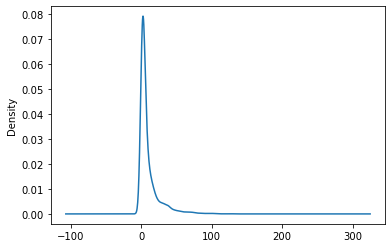

In [27]:
# Visualize the value counts of region_1
winery_counts.plot.density()

In [28]:
# From the plot the curve breaks between 10-20.
replace_winery = list(winery_counts[winery_counts <= 20].index)

# Replace in dataframe
for winery in replace_winery:
    US_wine_data_df_ml.winery = US_wine_data_df_ml.winery.replace(winery,"Other")
    
# Check to make sure binning was successful
US_wine_data_df_ml.winery.value_counts()

Other                    23508
Testarossa                 217
Williams Selyem            211
Chateau Ste. Michelle      193
Columbia Crest             158
                         ...  
Broken Earth                21
MCV                         21
Black Box                   21
Walnut City WineWorks       21
R2                          21
Name: winery, Length: 745, dtype: int64

### Encode categorical data

In [29]:
# Create variable to hold categorical columns for OneHotEncoder
wine_cat = ["variety", "winery"]

In [30]:
# from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(US_wine_data_df_ml[wine_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(wine_cat)
encode_df.shape
encode_df.head()

,variety_Bordeaux-style Red Blend,variety_Cabernet Franc,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Gewürztraminer,variety_Grenache,variety_Malbec,variety_Merlot,variety_Other,variety_Petite Sirah,...,winery_Woodbridge by Robert Mondavi,winery_Woodinville Wine Cellars,winery_Woodward Canyon,winery_Wrath,winery_Wölffer,winery_Y Rousseau,winery_ZD,winery_Zaca Mesa,winery_Écluse,winery_àMaurice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Merge one-hot encoded features and drop the originals
US_wine_data_df_ml = US_wine_data_df_ml.merge(encode_df,left_index=True, right_index=True)
US_wine_data_df_ml = US_wine_data_df_ml.drop(wine_cat,axis=1)
print(US_wine_data_df_ml.shape)
US_wine_data_df_ml.head()

(54265, 773)


,points,price,province,variety_Bordeaux-style Red Blend,variety_Cabernet Franc,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Gewürztraminer,variety_Grenache,variety_Malbec,...,winery_Woodbridge by Robert Mondavi,winery_Woodinville Wine Cellars,winery_Woodward Canyon,winery_Wrath,winery_Wölffer,winery_Y Rousseau,winery_ZD,winery_Zaca Mesa,winery_Écluse,winery_àMaurice
0,87,14.0,Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87,13.0,Michigan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87,65.0,Oregon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87,19.0,California,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87,34.0,California,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Convert target "province" categorical data to numerical data for machine learning
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# US_wine_data_df_ml["province_num"] = le.fit_transform(US_wine_data_df_ml["province"])
# print(US_wine_data_df_ml.shape)
# US_wine_data_df_ml.head()

In [33]:
# Save preprocessed dataframe to csv for future reference.
US_wine_data_df_ml.to_csv("Data/US_wine_data_enc.csv", index=False)

In [34]:
# Import data
US_wine_data_df_ml = pd.read_csv("Data/US_wine_data_enc.csv")

### Split preprocessed data 

In [36]:
# from sklearn.model_selection import train_test_split
# Split preprocessed data into our features and target arrays
#  Target
y = US_wine_data_df_ml["province"].values
# Features
X = US_wine_data_df_ml.drop(["province"],axis=1).values

In [37]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
# from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
print(X_train_scaled [0:5])

[[ 1.7447257   0.67362387 -0.18748622 ... -0.03711987 -0.01644252
  -0.02891575]
 [ 1.42378935  0.41826468 -0.18748622 ... -0.03711987 -0.01644252
  -0.02891575]
 [-0.1808924   1.03842272 -0.18748622 ... -0.03711987 -0.01644252
  -0.02891575]
 [-1.14370145 -0.45725256 -0.18748622 ... -0.03711987 -0.01644252
  -0.02891575]
 [-0.1808924   0.1264256  -0.18748622 ... -0.03711987 -0.01644252
  -0.02891575]]


## Machine Learning

### Try RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
# Create a random forest classifier. 
rf_model = RandomForestClassifier(n_estimators=500, random_state=42) 

In [42]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [43]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [44]:
predictions

array(['California', 'California', 'California', ..., 'California',
       'California', 'California'], dtype=object)

In [45]:
predictions.shape

(13567,)

In [55]:
from sklearn.metrics import multilabel_confusion_matrix
# Calculating the confusion matrix
# predicted_labels = US_wine_data_df_ml["province"].unique().tolist()

cm = multilabel_confusion_matrix(y_test, predictions,labels=predicted_labels) 
# cm = multilabel_confusion_matrix(y_test, predictions) 

In [56]:
predicted_labels

['Oregon',
 'Michigan',
 'California',
 'Virginia',
 'Washington',
 'New York',
 'Idaho',
 'Texas',
 'Pennsylvania',
 'America',
 'New Jersey',
 'Missouri',
 'New Mexico',
 'Nevada',
 'Colorado',
 'Arizona',
 'Massachusetts',
 'Ohio',
 'Illinois',
 'Washington-Oregon',
 'North Carolina',
 'Iowa',
 'Vermont',
 'Kentucky',
 'Connecticut',
 'Rhode Island',
 'Hawaii']

In [57]:
cm

array([[[11968,   210],
        [  527,   862]],

       [[13521,    17],
        [   28,     1]],

       [[ 3133,  1445],
        [  487,  8502]],

       [[13319,    54],
        [  127,    67]],

       [[11069,   361],
        [  706,  1431]],

       [[12825,    81],
        [  232,   429]],

       [[13503,    17],
        [   29,    18]],

       [[13537,    10],
        [   18,     2]],

       [[13558,     6],
        [    3,     0]],

       [[13536,     5],
        [   20,     6]],

       [[13565,     1],
        [    1,     0]],

       [[13553,     3],
        [   11,     0]],

       [[13549,     7],
        [    7,     4]],

       [[13565,     1],
        [    1,     0]],

       [[13546,     4],
        [   14,     3]],

       [[13543,    10],
        [   14,     0]],

       [[13564,     0],
        [    3,     0]],

       [[13564,     1],
        [    2,     0]],

       [[13565,     0],
        [    2,     0]],

       [[13565,     2],
        [    0,     0]],



In [58]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.8347460750350114

In [59]:
# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.8347460750350114
Classification Report
                   precision    recall  f1-score   support

          America       0.55      0.23      0.32        26
          Arizona       0.00      0.00      0.00        14
       California       0.85      0.95      0.90      8989
         Colorado       0.43      0.18      0.25        17
      Connecticut       0.00      0.00      0.00         1
            Idaho       0.51      0.38      0.44        47
         Illinois       0.00      0.00      0.00         2
             Iowa       0.00      0.00      0.00         2
         Kentucky       0.00      0.00      0.00         0
    Massachusetts       0.00      0.00      0.00         3
         Michigan       0.06      0.03      0.04        29
         Missouri       0.00      0.00      0.00        11
           Nevada       0.00      0.00      0.00         1
       New Jersey       0.00      0.00      0.00         1
       New Mexico       0.36      0.36      0.36        

C:\Users\kayse\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayse\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayse\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayse\anaconda3\envs\

In [ ]:
# Create json file of clean dataframe
import json
# convert dataframe to JSON string
US_wine_data_json = US_wine_data_df_copy.to_json(orient="split", indent=4, index=False)
US_wine_data_json